
# **03. 회귀 알고리즘과 모델 규제 : 농어의 무게를 예측하라**

# **03-1 k-최근접 이웃 회귀**

1.   회귀
2.   k-최근접 이웃 회귀
3.   결정계수
4.   과대적합과 과소적합



## 1. k-최근접 이웃 회귀
- 지도 학습 알고리즘 : 분류, 회귀
- 분류 : 샘플을 몇 개의 클래스 중 하나로 분류하기 (A or B)
- 회귀 : 임의의 어떤 숫자를 예측하기 (x 점)

In [2]:
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

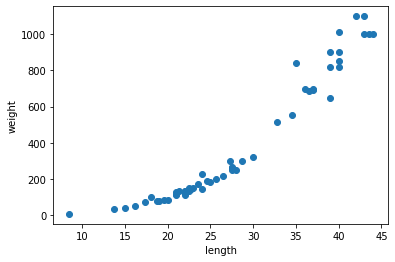

In [3]:
import matplotlib.pyplot as plt
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [4]:
# 길이 정보로 무게 정보 예측하기
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

In [5]:
# reshape(-1,1) : 남은 배열의 길이와 남은 차원으로부터 추정해서 알아서 지정하라는 의미 -> 오른쪽은 열의 길이를 의미한다. 2라면
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)
train_input.shape, test_input.shape

((42, 1), (14, 1))

## 2. 결정계수 (R^2)
- 분류에서의 score : test set에 있는 샘플을 정확하게 분류한 개수의 비율 (정확도)
- 회귀에서의 score : 결정계수<br/>
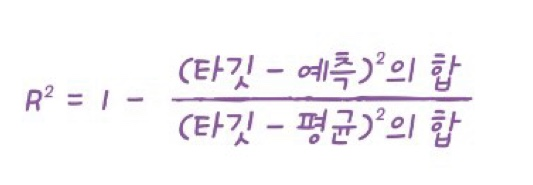

In [6]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()

knr.fit(train_input, train_target)
knr.score(test_input, test_target)

# 결정계수는 클 수록 좋은 것이다. 예측이 타깃에 아주 가까워졌다는 뜻이기 때문이다.

0.992809406101064

In [7]:
from sklearn.metrics import mean_absolute_error

# 테스트 세트에 대한 예측 만들기
test_prediction = knr.predict(test_input)

# 테스트 세트에 대한 평균의 절대값 오차 계산하기
mae = mean_absolute_error(test_target, test_prediction)
mae     # 예측이 타깃값과 평균적으로 19g 정도 다르다는 것을 알 수 잇음

19.157142857142862

In [8]:
# 훈련 세트로 평가해보기
knr.score(train_input, train_target)

0.9698823289099254

- test set 결과 < train set 결과 : 과대적합
- test set 결과 > train set 결과 : 과소적합
  - 훈련 세트 평가 : 0.9698823289099254
  - 테스트 세트 평가 : 0.992809406101064
- 과소 적합 해결 방법 : 모델을 좀 더 복잡하게 만든다.
  - k-최근접 이웃의 개수를 5에서 3으로 줄인다. 

In [9]:
knr.n_neighbors = 3
knr.fit(train_input, train_target)
knr.score(train_input, train_target)

# 훈련 세트 평가 점수가 높아졌음

0.9804899950518966

In [10]:
knr.score(test_input, test_target)

# 테스트 세트 평가 점수가 낮아짐

0.9746459963987609

- 과대적합과 과소적합 모델 만들기
  - k 값을 1, 5, 10으로 바꿔가며 훈련한다.
  - 농어의 길이를 5에서 45까지 바꿔가며 그래프로 나타낸다.

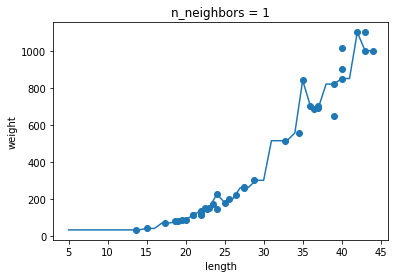

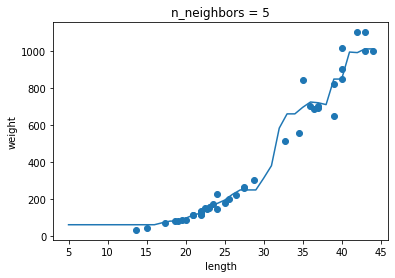

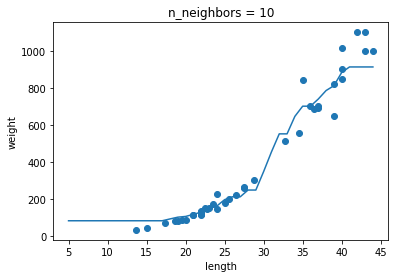

In [14]:
x = np.arange(5, 45).reshape(-1, 1)

for n in [1, 5, 10]:
  knr.n_neighbors = n
  knr.fit(train_input, train_target)
  prediction = knr.predict(x)

  plt.scatter(train_input, train_target)
  plt.plot(x, prediction)
  plt.title('n_neighbors = {}'.format(n))
  plt.xlabel('length')
  plt.ylabel('weight')
  plt.show()

# 실선 : 예측
# 점 : 훈련 세트

# **03-2 선형 회귀**


## 1. 선형 회귀

In [17]:
knr.n_neighbors = 3
knr.fit(train_input, train_target)
knr.predict([[50,]])

# 50cm의 농어의 무게는 1500kg이었음. 예측 결과와 큰 차이가 난다.

array([1033.33333333])

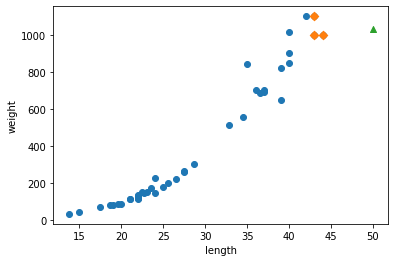

In [18]:
# 50cm 농어의 이웃 세마리를 구한다.
distances, indexes = knr.kneighbors([[50,]])
plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker='D')    # 이웃 농어 표시
plt.scatter(50, 1033, marker='^')                                       # 50cm 농어 표시
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [19]:
train_target[indexes]

array([[1000., 1000., 1100.]])

In [20]:
np.average(train_target[indexes])

1033.3333333333333

In [21]:
knr.predict([[150, ]])

# 길이가 150cm인 농어의 무게도 1033kg으로 예측한다.
# 새로운 샘플이 훈련 세트의 범위를 벗어나면 엉뚱한 값으로 예측한다.
# 해결 방법 : 선형 회귀 알고리즘

array([1033.33333333])

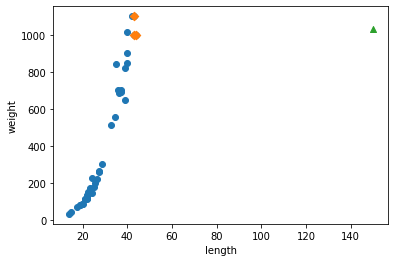

In [22]:
# 길이가 150cm인 농어의 이웃과 예측 값 표시
indexes = knr.kneighbors([[150,]], return_distance=False)
plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
plt.scatter(150, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [25]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_input, train_target)
lr.predict([[50, ]])

array([1241.83860323])

In [26]:
print(lr.coef_, lr.intercept_)
# 기울기 (종종 계수 , 가중치): lr.coef_
# y 절편 : lr.intercept_

# 모델 파라미터 :  coef와 intercept는 머신러닝 알고리즘이 찾은 값이다.
# 모델 기반 학습 : 최적의 파라미터를 찾기 위해서 머신러닝 알고리즘의 훈련 과정이 필요하다.
# 사례 기반 학습 : k-최근접 이웃에는 모델 파라미터가 없다. 단지 주변의 데이터를 기반으로 평균을 내어, 또는 주변의 분류에 근거하여 예측하는 것이다.


[39.01714496] -709.0186449535477


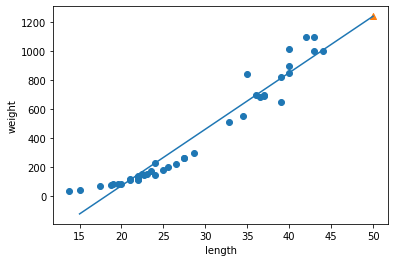

In [27]:
plt.scatter(train_input, train_target)
plt.plot([15,50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])

plt.scatter(50, 1241.8, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [28]:
print(lr.score(train_input, train_target))    # 훈련 세트
print(lr.score(test_input, test_target))      # 테스트 세트

0.939846333997604
0.8247503123313558


## 2. 다항 회귀

- 훈련 세트와 테스트 세트의 점수 차이가 나는 것이 문제일 수도 있지만 더 큰 문제는 훈련 세트의 점수도 그리 높지 않다는 것임.
- 과소적합의 결과가 나왔다고 생각할 수 있다.
- 원인 : weight가 음수인 경우가 계산되고 있다.
- 해결 : 다항 회귀
- ※ scikit-learn에 다항 회귀를 위한 클래스가 별도로 존재하지는 않는다.

In [29]:
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))
print(train_poly, test_poly)

[[ 384.16   19.6 ]
 [ 484.     22.  ]
 [ 349.69   18.7 ]
 [ 302.76   17.4 ]
 [1296.     36.  ]
 [ 625.     25.  ]
 [1600.     40.  ]
 [1521.     39.  ]
 [1849.     43.  ]
 [ 484.     22.  ]
 [ 400.     20.  ]
 [ 484.     22.  ]
 [ 576.     24.  ]
 [ 756.25   27.5 ]
 [1849.     43.  ]
 [1600.     40.  ]
 [ 576.     24.  ]
 [ 441.     21.  ]
 [ 756.25   27.5 ]
 [1600.     40.  ]
 [1075.84   32.8 ]
 [ 702.25   26.5 ]
 [1332.25   36.5 ]
 [ 187.69   13.7 ]
 [ 515.29   22.7 ]
 [ 225.     15.  ]
 [1369.     37.  ]
 [1225.     35.  ]
 [ 823.69   28.7 ]
 [ 552.25   23.5 ]
 [1521.     39.  ]
 [ 441.     21.  ]
 [ 529.     23.  ]
 [ 484.     22.  ]
 [1936.     44.  ]
 [ 506.25   22.5 ]
 [ 361.     19.  ]
 [1369.     37.  ]
 [ 484.     22.  ]
 [ 655.36   25.6 ]
 [1764.     42.  ]
 [1190.25   34.5 ]] [[  70.56    8.4 ]
 [ 324.     18.  ]
 [ 756.25   27.5 ]
 [ 453.69   21.3 ]
 [ 506.25   22.5 ]
 [1600.     40.  ]
 [ 900.     30.  ]
 [ 605.16   24.6 ]
 [1521.     39.  ]
 [ 441.     21.  ]
 [1892.25  

In [32]:
lr = LinearRegression()
lr.fit(train_poly, train_target)
lr.predict([[50**2, 50]])

array([1573.98423528])

In [35]:
print(lr.coef_, lr.intercept_)
# 무게 = 1.01 * 길이^2 - 21.6 * 길이 + 116.05

[  1.01433211 -21.55792498] 116.0502107827827


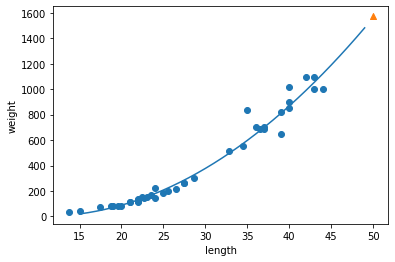

In [37]:
point = np.arange(15,50)
plt.scatter(train_input, train_target)
plt.plot(point, 1.01*point**2 - 21.6*point + 116.05)

plt.scatter(50, 1574, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [38]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))
# 아직까지 과소적합이 남아있다.

0.9706807451768623
0.9775935108325122
